In [55]:
import pandas as pd
import numpy as np

In [56]:
df = pd.read_csv('social_network_ads.csv')
df.head() # df is dataframe

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [57]:
x = df.iloc[:, [2,3] ].values #Age and EstimatedSalary
y = df.iloc[:, 4 ].values  #Purchased

In [58]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
#classifier
clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [61]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred) # actual and predicted
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [65]:
import matplotlib.pyplot as plt

cm_df = pd.DataFrame(cm,
                   index = ['Age','EstimatedSalary'],
                   columns = ['Age','EstimatedSalary'])

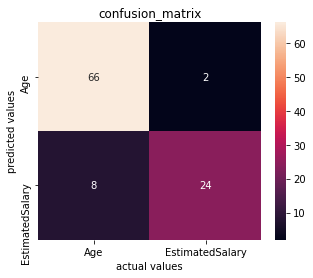

In [72]:
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm_df,annot=True)
plt.title('confusion_matrix')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()
